| |<font size="5">LinearRegression الانحدار الخطي البسيط    </font>|
|-:|-:|
|<img src="https://machinelearningmind.files.wordpress.com/2019/10/38fdc-1wyes_ieva6yg5nvugvrxlq.png?w=300"></img>|
||<font size="4"> تحميل البيانات وحفظها </font>| 
||<font size="4">  تقسيم البيانات إلى بيانات تدريبية واخرى تجريبية </font>| 
||<font size="4"> توظيف خوارزمية انحدار خطي  </font>|
||<font size="4"> تقويم معايير أداء خوارزمية الانحدار الخطي  </font>|

# النمذجة 

In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("../data/HousePrice1.csv", index_col=0)

In [ ]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,TotalPorchSF,TotalBath,SnMoSold,CsMoSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2008,WD,Normal,208500,2566,61,3.5,0.866025,5.000000e-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,2007,WD,Normal,181500,2524,0,2.5,0.500000,-8.660254e-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,2008,WD,Normal,223500,2706,42,3.5,-1.000000,-1.836970e-16


![](https://image.flaticon.com/icons/png/128/3079/3079166.png)

In [3]:
# اكبر 7 ارتباطات 
# ترتيب درجة الارتباط 
import numpy as np
cormat=np.abs(df.select_dtypes(include="number").corr()["SalePrice"]).sort_values(ascending=False)

cormat.nlargest(7)

SalePrice      1.000000
OverallQual    0.790982
TotalSF        0.778959
GarageCars     0.640409
TotalBath      0.631731
GarageArea     0.623431
1stFlrSF       0.605852
Name: SalePrice, dtype: float64

![](https://thumbs.gfycat.com/ZealousBewitchedHapuka-size_restricted.gif)

## الانحدار الخطي 

$\large \hat y= \beta_0 + \beta_1 x$

![](https://miro.medium.com/max/1280/1*fX95txC9xSwSPeP6ch2nmg.gif)

## تقسيم البيانات 

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [4]:
from sklearn.model_selection import train_test_split
X=df.OverallCond.values.reshape(-1,1)
y=df.SalePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split( X, y , test_size=.3, random_state=42)

In [5]:
import statsmodels.api as sm
lrg = sm.OLS(y_train, X_train).fit()
print(lrg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              4162.
Date:                Sun, 02 Mar 2025   Prob (F-statistic):                        0.00
Time:                        12:29:04   Log-Likelihood:                         -13080.
No. Observations:                1022   AIC:                                  2.616e+04
Df Residuals:                    1021   BIC:                                  2.617e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

-  reject the null hypothesis that the coefficient is equal to 0 and conclude that x1 is an important independent variable to utilize.|

In [6]:
# تحميل وظيفة الانحدار الخطي
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()


![](https://static.thenounproject.com/png/2010152-200.png)

In [ ]:
# تدريب البيانات الخاصة بالتدريب 
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# تحديد درجة الانحدار 
lreg.coef_ #.round(3)

array([[-4994.43463065]])

In [ ]:
# y تحديد تقاطع محور 
lreg.intercept_ #.round(3)

array([209104.62010224])


###   $$\large \hat y= \beta_0 + \beta_1 x$$

 : $$\large \hat y=   +  x$$

###  التنبؤ

$$\Large \text{y_pred} = model.\text{intercept_} + model.\text{coef_}  \color{red}{x}$$

In [ ]:
y_pred=lreg.predict(X_test)

In [ ]:
# الوظيفة العكسية
np.log1p(np.expm1(1))

1.0

In [ ]:
# مقارنة البيانتات الأصلية وتلك التي تم التنبؤ بها
pd.options.display.precision=3
df_pred=pd.DataFrame( {"Actual_P": y_test.ravel(), "Predicted_P": y_pred.ravel() })
df_pred.head()

,Actual_P,Predicted_P
0,154500,169149.143
1,325000,184132.447
2,115000,179138.012
3,159000,174143.578
4,315500,184132.447


In [ ]:
df_pred.keys()

Index(['Actual_P', 'Predicted_P'], dtype='object')

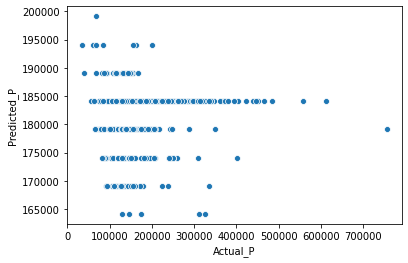

In [ ]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.scatterplot("Actual_P",  "Predicted_P", data=df_pred)

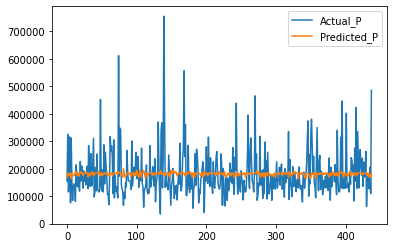

In [ ]:
#  تباين القيم الحالية والت يتم التنبؤ بها
df_pred.plot()

### القياس 
![](https://i.ibb.co/wQC2qF6/ruler.png)

In [ ]:
# تحديد درجة تعبير قيم تباين  البيانات التي تم التنبؤ بها عن قيم تباين المتغيرات 
# بيانات التدريب 
from sklearn  import metrics
f"  Score  :  {lreg.score(X_train, y_train):.3f}"


'  Score  :  0.005'

In [ ]:
# بيانات الاختبار 
f"  Score  :  {lreg.score(X_test, y_test):.3f}"

'  Score  :  0.008'

## MAE
![](https://i.imgur.com/tqnei6J.jpg)

$\Large  MAE = \frac 1 n \sum_{i=1}^N |Y_i - \hat Y_i|$

$\Large  MAE = \frac 1 n \sum_{i=1}^N |actual  - predicted|$

- MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.

In [ ]:
# تقدير معدل الخطأ  فيما بين القيم الحقيقة وتلك لاتي تم التنبؤ بها
f"  Mean Absolute Error  MAE  :  {metrics.mean_absolute_error(y_test, y_pred):.3f}"

'  Mean Absolute Error  MAE  :  58874.077'

$\Large  MSE = \frac 1 n \sum_{i=1}^N (Y_i - \hat Y_i)^2$

![](https://i.imgur.com/mLn8AeW.jpg)

In [ ]:
f"  Mean Squared Error  :  {metrics.mean_squared_error(y_test, y_pred):.3f}"

'  Mean Squared Error  :  6925261601.066'

$\Large  MSE = \sqrt {\frac 1 n \sum_{i=1}^N (Y_i - \hat Y_i)^2}$

- RMSE: 
  - average magnitude of the error.
  - RMSE should be more useful when large errors are particularly undesirable.

  
it allows us to estimate the standard deviation σ of the error for a typical single observation rather than some kind of “total error”

( it just becomes more accurate as we increase the number of observations)
- RMSE is a good way to answer the question: “How far off should we expect our model to be on its next prediction?”
$\large  Observed_{value}= predicted_{value} + \text{ predicatbly Distributed random noise with mean Zero} $
- The random noise here could be anything that our model does not capture

- Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.  



In [ ]:
#  مقياس مفيد في حالة ما إذا طان لدينا قيم متطرفة غير مرغوب فيها
f"  RMSE  :  {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}"

'  RMSE  :  83218.157'

$\Large  R^2= \frac {Variance_{predicte\_y}}{ Variance_{Actual\_y}}$

In [ ]:
# R2: is the Coefficient of Determination which measures the amount of variation explained by the (least-squares) Linear Regression.
f"  R2:  :  {metrics.r2_score(y_test, y_pred):.3f}"

'  R2:  :  0.008'

- When we compare the R2 Score with the Explained Variance Score, we are basically checking the Mean Error; so if R2 = Explained Variance Score, that means: The Mean Error = Zero!

In [ ]:
metrics.explained_variance_score(y_test, y_pred)

0.0077527750118799865

In [1]:
http://hama-univ.edu.sy/newsites/agricultural/wp-content/uploads/2018/10/%D8%A7%D9%84%D8%A7%D8%AD%D8%B5%D8%A7%D8%A1-%D9%83%D8%A7%D9%85%D9%84.pdf

SyntaxError: ignored